## **1. Meet Dr.Ignaz Semmelweiz**

Ignaz Semmelwiz was an Hungarian Physician born in 1818. He was really cnverned about childbed fever, a deadly disease affecting women that just gave birth. Around 1840 at the Hospital he was working, almost 10% of the giving birth women die.
Now we remember him because he get to know that the cause of the disease was the doctors that were not washing their hands before the delivery. He was the first one to enforce the handwashing and he saved hundreds of lives.

## **2. The alarming number of deaths**

Let's dive into the data and see what we can find out. We will start by looking at the number of deaths from puerperal fever at the two clinics.

In [1]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


As we can see, this table shows the number of women giving birth in *clinic 1* and *clinic 2* and also de number of deaths in both clinics, and also we can rapidly note that this includes the data from year *1841* to *1846*.

## **3. Death at the clinics**

To get a more clear idea of the problematic we will look at the proportion of $\frac{\textit{deaths}}{\textit{births}}$ in both clinics.

In [4]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly.deaths / yearly.births

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 =yearly[yearly['clinic']=='clinic 1']
yearly2 = yearly[yearly['clinic']=='clinic 2']

# Print out yearly1
print(yearly1)
# Print out yearly2
print(yearly2)


   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


Now we want to plot the *proportion_deaths* from both clinics per year to compare them.

<AxesSubplot:xlabel='year'>

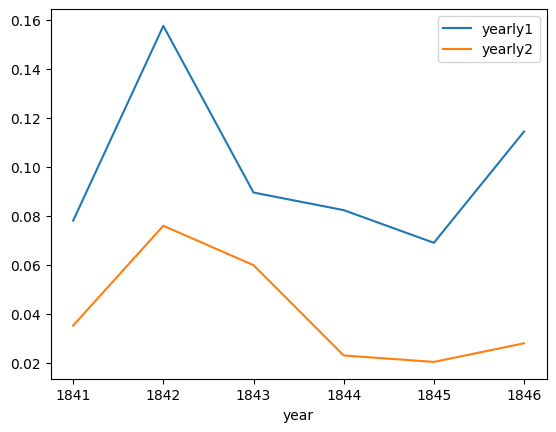

In [5]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x='year', y='proportion_deaths', label='yearly1') 
yearly2.plot(x='year', y='proportion_deaths', label='yearly2', ax=ax)

As suggested in the tables before, it is clear that *clinic 1* has a higher proportion of deaths than *clinic 2* so there is clearly a problem in *clinic 1*.

## **4. The handwashing begins**

Now that we observe that the porportion of $\frac{\textit{deaths}}{\textit{births}}$ is higher in *clinic 1* than in *clinic 2*, we can also note that the problem in *clinic 1* has been constant through the years. Also, the only apparent difference between the two clinics is that *clinic 1* has many more students than *clinic 2* in the birth room's that were not solely dedicated to the delivery of babies.

Obviusly was known by him and helped to reach the final conclussion, but all we know is that *clinic 1* needs attention so we will focus on it.

In [6]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv',parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly.deaths / monthly.births
# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


So it is safe to assume that some drastic swindles were going on that affected the *proportion_deaths* in *clinic 1* and it is suggested that it may have something to do with the handwashing.

## **5. The effect of handwashing**

Now we can also mark in the plot when the mandatory handwashing was enforced in *clinic 1*.

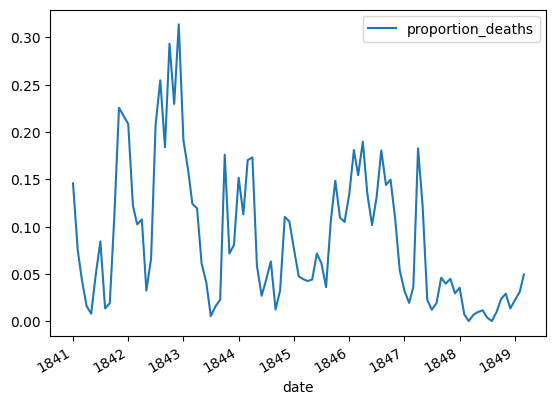

In [7]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths')

Si this is *proportion_deaths* plot by year in both clinics. So lets see if the handwashing had any effect.

We know that the handwashing was enforced in *clinic 1* in 1847, so we can see that the proportion of deaths in both clinics highliting the effects of the handwashing.

Text(0, 0.5, 'Proportion deaths')

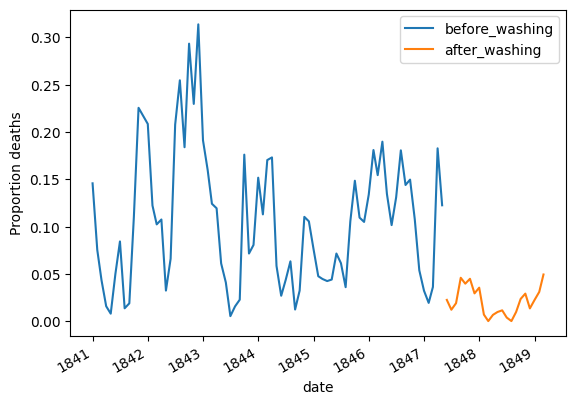

In [8]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date']< handwashing_start]
after_washing = monthly[monthly['date']>= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
%matplotlib inline
ax=before_washing.plot(x='date',y='proportion_deaths',label='before_washing')
after_washing.plot(x='date',y='proportion_deaths',label='after_washing', ax=ax)
ax.set_ylabel('Proportion deaths')

## **6. More handwashing, fewer deaths?**

It is clear that the enforcement had a massive effect, so lets try to estimate the change.

In [9]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

So it is clear now that the proportion of deaths was reduced by $8%$ when it was around $10%$ before.

## **7. A Bootstrap analysis of Semmelweis handwashing data**

We want to be more sure about the handwashing effects to reduce mortality so we know well peek into the confidence intervals using the bootstrap method which is a resampling method.

In [10]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()- boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.101129
0.975   -0.067242
dtype: float64

Let's use numpy now to create a bootstrap sample of the data and calculate the difference in mean death rates.

In [12]:
# A bootstrap analysis of the reduction of deaths due to handwashing
import numpy as np
boot_mean_diff = []
for i in range(3000):
    boot_before = np.random.choice(before_proportion,len(before_proportion))
    boot_after = np.random.choice(after_proportion,len(after_proportion))
    boot_mean_diff.append(boot_after.mean()- boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = np.percentile(boot_mean_diff,[2.5,97.5])
confidence_interval

array([-0.10120574, -0.06697537])

So we can now say that **handwashing** reduced the proportion of deaths between $6.7%$ and $10%$ according to a $95%$ confidence interval.

And finally it is clear that Dr. Semmelweis was right when he keep insisting that the handwashing was the solution to the problem or one of the solutions.



#### *This was collected and solved by jdpalmad. Suggestions and Data can be found at Datacamp*